In [ ]:
import pandas as pd
import numpy as np
import io
from google.colab import files

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

*   Прочитайте csv файл (используйте функцию read_csv)
*   Выведите первый пять строчек (используется функцию head)


*   Выведите размеры датасета (используйте атрибут shape)
*   Ответ: О скольки книгах хранит данные датасет? **550**








In [ ]:
uploaded = files.upload()

Saving bestsellers with categories.csv to bestsellers with categories.csv


In [ ]:
path = "bestsellers with categories.csv"
data = pd.read_csv(path)


print(data.tail(5))
print(data.shape)

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  
                                                  Name       Author  \
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)  Jeff Kinney   
546  You Are a Badass: How to Stop Doubting Your Gr..

In [ ]:
data.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [ ]:
data.head(5)

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


(4.0, 5.0)

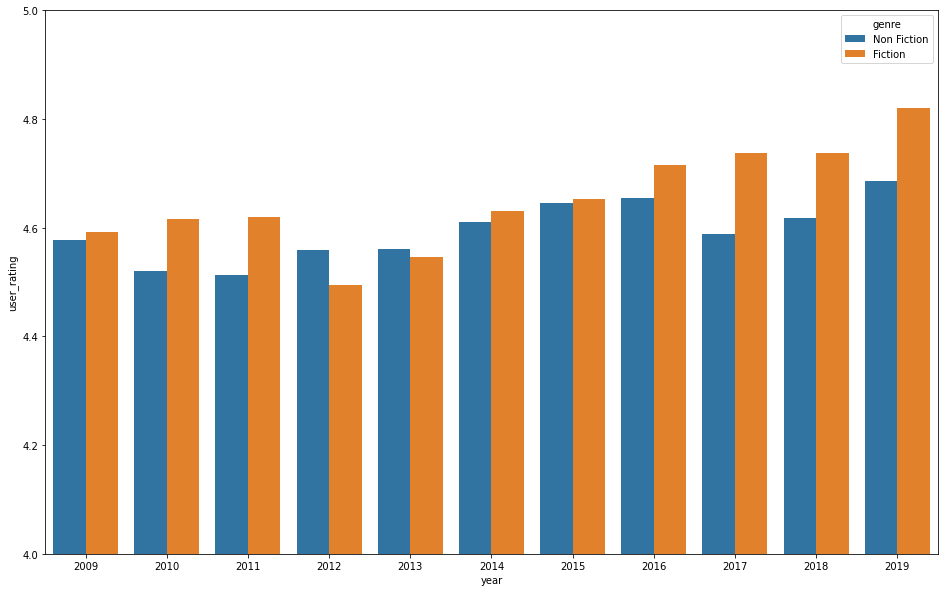

In [ ]:
plt.figure(figsize=(16, 10))
plot = sns.barplot(x='year',
            y='user_rating', 
            hue='genre', 
            ci=None,
            data=data)
plot.set_ylim(4, 5)

# Первичное исследование данных


*   Проверьте у всех ли строк хватает данных: выведите количество пропусков (na) в каждом из столбцов (используйте функции isna и sum)

*   Ответ: Есть ли в каких либо переменных пропуски? **НЕТ**

*   Проверьте, какие есть уникальные значения в колонке genre (используйте функцию unique)

*   Ответ: Какие есть уникальные жанры? **'Non Fiction', 'Fiction'**

*   Теперь посмотрите на распределение цен: постройте диаграмму (используйте kind='hist')

*   Определите, какая цена у нас максимальная, минимальная, средняя, медианная (используйте функции max, min, mean, median)

*   Ответ: Mаксимальная цена?  **105**
*   Ответ: Минимальная цена?  **0**


*   Ответ: Средняя цена? **13.1**


*   Ответ: Медианная цена? **11**







In [ ]:
np.sum(data.isnull())

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

In [ ]:
data['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

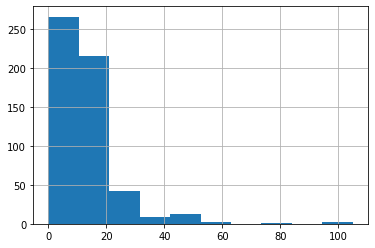

In [ ]:
data['price'].hist()

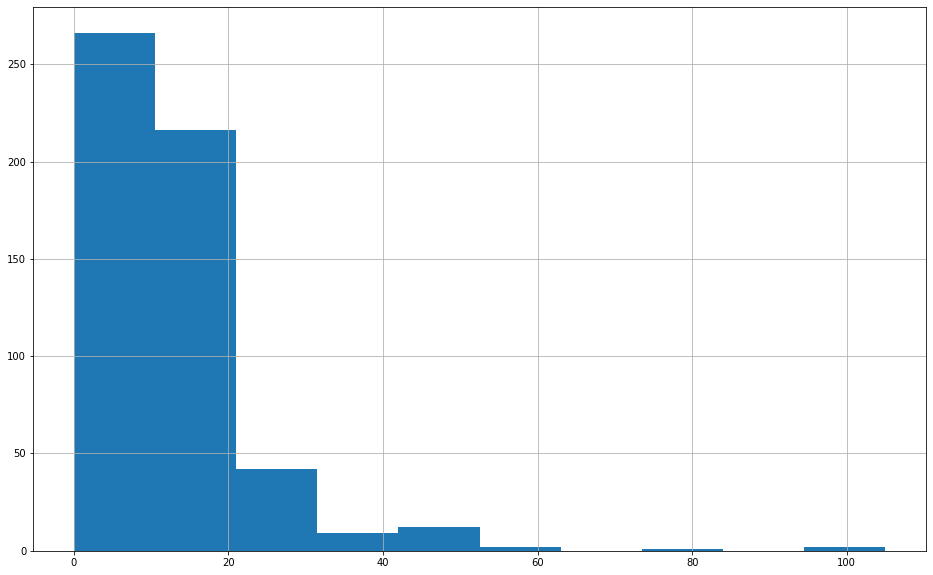

In [ ]:
plt.figure(figsize=(16, 10))
plt.hist(data['price']);
plt.grid()
plt.show()

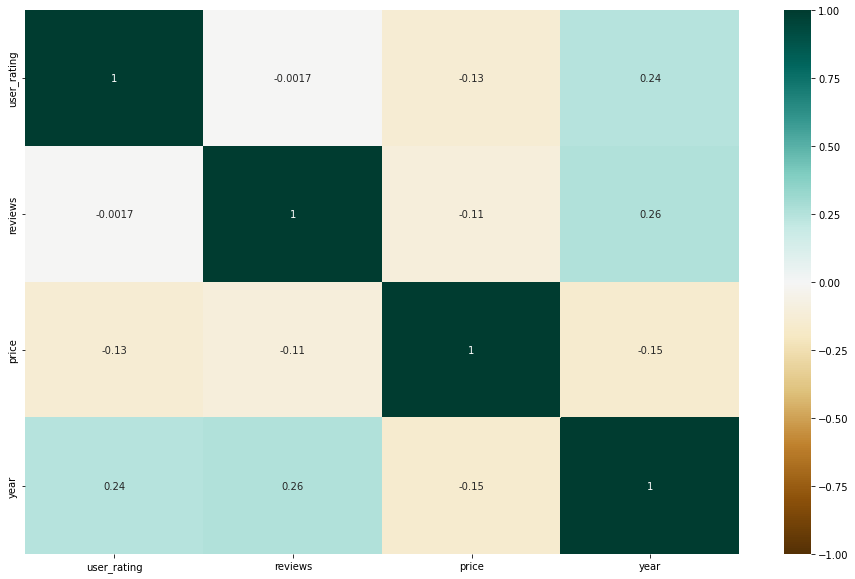

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG');

In [ ]:
data['price'].agg(['min', 'max', 'mean', 'median'])

min         0.0
max       105.0
mean       13.1
median     11.0
Name: price, dtype: float64

# Поиск и сортировка данных
*   Ответ: Какой рейтинг в датасете наивысший? Ответ: **4.9**
*   Ответ: Сколько книг имеют такой рейтинг? Ответ:  **52**
*   Ответ: У какой книги больше всего отзывов? Ответ: **Where the Crawdads Sing**
*   Ответ: Из тех книг, что попали в Топ-50 в 2015 году, какая книга самая дорогая (можно использовать промежуточный датафрейм)? Ответ: **Publication Manual of the American Psychological Association, 6th Edition**
*   Ответ: Сколько книг жанра Fiction попали в Топ-50 в 2010 году (используйте &)? Ответ: **20**
*   Ответ: Сколько книг c рейтингом 4.9 попало в рейтинг в 2010 и 2011 годах (используйте | или функцию isin)? Ответ: **1**
*   И напоследок, давайте отсортируем по возрастанию цены все книги, которые попали в рейтинг в 2015 году и стоят дешевле 8 долларов (используйте функцию sort_values).
Ответ: Какая книга последняя в отсортированном списке? Ответ: **Old School (Diary of a Wimpy Kid #10)**

In [ ]:
data['user_rating'].max()

4.9

In [ ]:
len(data['user_rating'][data['user_rating'] == data['user_rating'].max()])

52

In [ ]:
data['name'][data['reviews'].sort_values()[-1:].index[0]]

'Where the Crawdads Sing'

In [ ]:
data['name'][data['price'][data['year'] == 2015].sort_values()[-1:].index[0]]

'Publication Manual of the American Psychological Association, 6th Edition'

In [ ]:
data[data['year'] == 2015]

In [ ]:
len(data[(data['genre'] == 'Fiction') & (data['year'] == 2010)])

20

In [ ]:
len(data[(data['user_rating'] == 4.9) & (data['year'] == 2010|2011)])

1

In [ ]:
data[(data['price'] < 8) & (data['year'] == 2015)].sort_values(by='price')[-1:]['name']

253    Old School (Diary of a Wimpy Kid #10)
Name: name, dtype: object

# Агрегирование данных и соединения таблиц
*   Для начала давайте посмотрим на максимальную и минимальную цены для каждого из жанров (используйте функции groupby и agg, для подсчета минимальных и максимальных значений используйте max и min). Не берите все столбцы, виберете только нужные вам

*   Ответ: Максимальная цена для жанра Fiction: Ответ **105**
*   Ответ: Минимальная цена для жанра Fiction: Ответ **83**
*   Ответ: Максимальная цена для жанра Non Fiction: Ответ **0**
*   Ответ: Минимальная цена для жанра Non Fiction: Ответ  **0**
*   Теперь создайте новый датафрейм, который будет вмещать в себя количество книг для каждого из авторов (используйте функции groupby и agg, для подсчета количества используйте count). Не берите все столбцы, виберете только нужные
*   Ответ: Какой размерности вышла таблица? Ответ: **(248, 6)**
*   Ответ: У какого автора больше всего книг? Ответ: **Jeff Kinney**
*   Ответ: Сколько книг у этого автора? Ответ: **12**
*   Теперь создайте второй датафрейм, который будет вмещать средний рейтинг для каждого автора (используйте функции groupby и agg, для подсчета среднего значения используйте mean). Не берите все столбцы, виберете только нужные
*   Ответ: У какого автора средний рейтинг минимальный? Ответ: **Donna Tartt**
*   Ответ: Какой у этого автора средний рейтинг? Ответ: **3.9**
*   Соедините последние два датафрейма так, чтобы для каждого автора было видно количество книг и средний рейтинг (Используйте функцию concat с параметром axis=1). Сохраните результат в переменную
*   Отсортируйте датафрейм по возрастающему количеству книг и возрастающему рейтингу (используйте функцию sort_values)
*   Ответ: Какой автор первый в списке? **Muriel Barbery**

In [ ]:
data.groupby(['genre']).agg(['min', 'max'])

name  \
                                       min   
genre                                        
Fiction                  11/22/63: A Novel   
Non Fiction  10-Day Green Smoothie Cleanse   

                                                                \
                                                           max   
genre                                                            
Fiction           Wrecking Ball (Diary of a Wimpy Kid Book 14)   
Non Fiction  You Are a Badass: How to Stop Doubting Your Gr...   

                       author                   user_rating      reviews  \
                          min               max         min  max     min   
genre                                                                      
Fiction      Abraham Verghese  Wizards RPG Team         3.3  4.9     548   
Non Fiction    Adam Gasiewski      Zhi Gang Sha         4.0  4.9      37   

                   price       year        
               max   min  max   min   max  
genre                                      
Fiction      87841     0   82  2009  2019  
Non Fiction  61133     0  105  2009  2019

In [ ]:
author_data = data.groupby(['author']).agg(['count'])
author_data.shape

(248, 6)

In [ ]:
author_data['name'].sort_values(by='count')[-1:]

,count
author,
Jeff Kinney,12


In [ ]:
raiting_data = data.groupby(['author']).agg(['mean'])
raiting_data

,user_rating,reviews,price,year
,mean,mean,mean,mean
author,,,,
Abraham Verghese,4.600000,4866.000000,11.000000,2010.500000
Adam Gasiewski,4.400000,3113.000000,6.000000,2017.000000
Adam Mansbach,4.800000,9568.000000,9.000000,2011.000000
Adir Levy,4.800000,8170.000000,13.000000,2019.000000
Admiral William H. McRaven,4.700000,10199.000000,11.000000,2017.000000
...,...,...,...,...
Walter Isaacson,4.566667,6222.666667,20.333333,2013.333333
William Davis,4.400000,7497.000000,6.000000,2012.500000


In [ ]:
author = raiting_data['user_rating'].sort_values(by='mean')[0:1]
author

,mean
author,
Donna Tartt,3.9


In [ ]:
new_data = pd.concat([raiting_data['user_rating'], author_data['name']], axis=1)
new_data

,mean,count
author,,
Abraham Verghese,4.600000,2
Adam Gasiewski,4.400000,1
Adam Mansbach,4.800000,1
Adir Levy,4.800000,1
Admiral William H. McRaven,4.700000,1
...,...,...
Walter Isaacson,4.566667,3
William Davis,4.400000,2
William P. Young,4.600000,2


In [ ]:
new_data.sort_values(['count', 'mean'])

,mean,count
author,,
Muriel Barbery,4.000000,1
Chris Cleave,4.100000,1
Ian K. Smith M.D.,4.100000,1
Pierre Dukan,4.100000,1
Elizabeth Strout,4.200000,1
...,...,...
American Psychological Association,4.500000,10
Suzanne Collins,4.663636,11
Gary Chapman,4.736364,11
